In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk
from tkinter import filedialog
import time
time.clock = time.time

#Prompt user for file
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(filetypes=[("Two Column CSV","*.csv")])
print(file_path)

C:/Users/daved/OneDrive/Documents/GitHub/DSP/spectral_analysis/aircraft.csv


In [7]:
#Load Data (assumes two column array
tic = time.clock()
t, x = np.genfromtxt(file_path,delimiter=',', unpack=True)
toc = time.clock()
print("Load Time:",toc-tic)

Load Time: 4.628540277481079


In [9]:
#Determine variables
N = np.int_(np.prod(t.shape))#length of the array
Fs = 1/(t[1]-t[0]) 	#sample rate (Hz)
T = 1/Fs;
print("# Samples:",N)

# Samples: 2465342


Plot Time: 0.1175992488861084


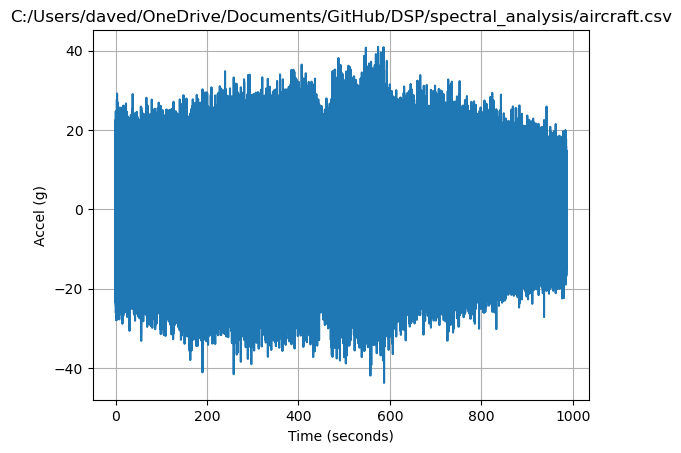

In [12]:
#Plot Data
tic = time.clock()
plt.figure(1)
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.ylabel('Accel (g)')
plt.title(file_path)
plt.grid()
toc = time.clock()
print("Plot Time:",toc-tic)

RMS Time: 0.0357966423034668


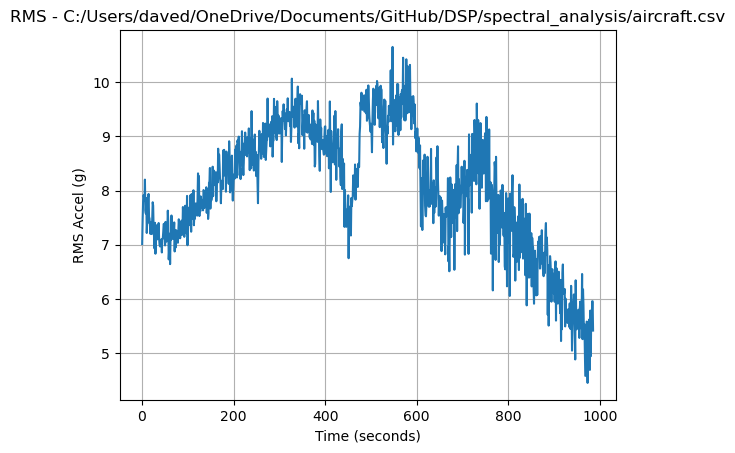

In [15]:
#Compute RMS and Plot
tic = time.clock()
w = np.int_(np.floor(Fs)); #width of the window for computing RMS
steps = np.int_(np.floor(N/w)); #Number of steps for RMS
t_RMS = np.zeros((steps,1)); #Create array for RMS time values
x_RMS = np.zeros((steps,1)); #Create array for RMS values
for i in range (0, steps):
	t_RMS[i] = np.mean(t[(i*w):((i+1)*w)]);
	x_RMS[i] = np.sqrt(np.mean(x[(i*w):((i+1)*w)]**2));
plt.figure(2)
plt.plot(t_RMS, x_RMS)
plt.xlabel('Time (seconds)')
plt.ylabel('RMS Accel (g)')
plt.title('RMS - ' + file_path)
plt.grid()
toc = time.clock()
print("RMS Time:",toc-tic)